In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
factors = df.drop(['Attrition', 'BusinessTravel', 'Department',
                   'EducationField', 'EmployeeCount', 'EmployeeNumber',
                  'Gender', 'JobRole', 'MaritalStatus', 'Over18',
                  'OverTime', 'HourlyRate', 'MonthlyRate',
                  'PerformanceRating', 'StandardHours'], axis=1
                 )

In [6]:
df['Retained'] = np.where(df['Attrition']=='No', 1, 0)

In [7]:
print(np.mean(df.YearsWithCurrManager[(df['Retained']==0)]))
print(np.mean(df.YearsWithCurrManager[(df['Retained']==1)]))

2.852320675105485
4.367396593673966


In [8]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [9]:
factors['BusinessTravelFreq'] = np.where(df['BusinessTravel']=='Non-Travel', 0, 
         (np.where(df['BusinessTravel']=='Travel_Frequently', 1, 0.5)))

In [10]:
factors['OverTime'] = np.where(df['OverTime']=='Yes', 1, 0)

In [11]:
dept = pd.get_dummies(df['Department'], prefix='Dept')

In [12]:
ef = pd.get_dummies(df['EducationField'], prefix='Degree')

In [13]:
jr = pd.get_dummies(df['JobRole'], prefix='Role')

In [14]:
ms = pd.get_dummies(df['MaritalStatus'])

In [15]:
factors = pd.concat([factors, dept, ef, jr, ms], axis=1)

In [16]:
factors.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Divorced,Married,Single
0,41,1102,1,2,2,3,2,4,5993,8,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,2,2,2,5130,1,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,2,1,3,2090,6,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,3,1,3,2909,1,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,3,1,2,3468,9,...,1,0,0,0,0,0,0,0,1,0


--- 0.00178909301758 seconds ---


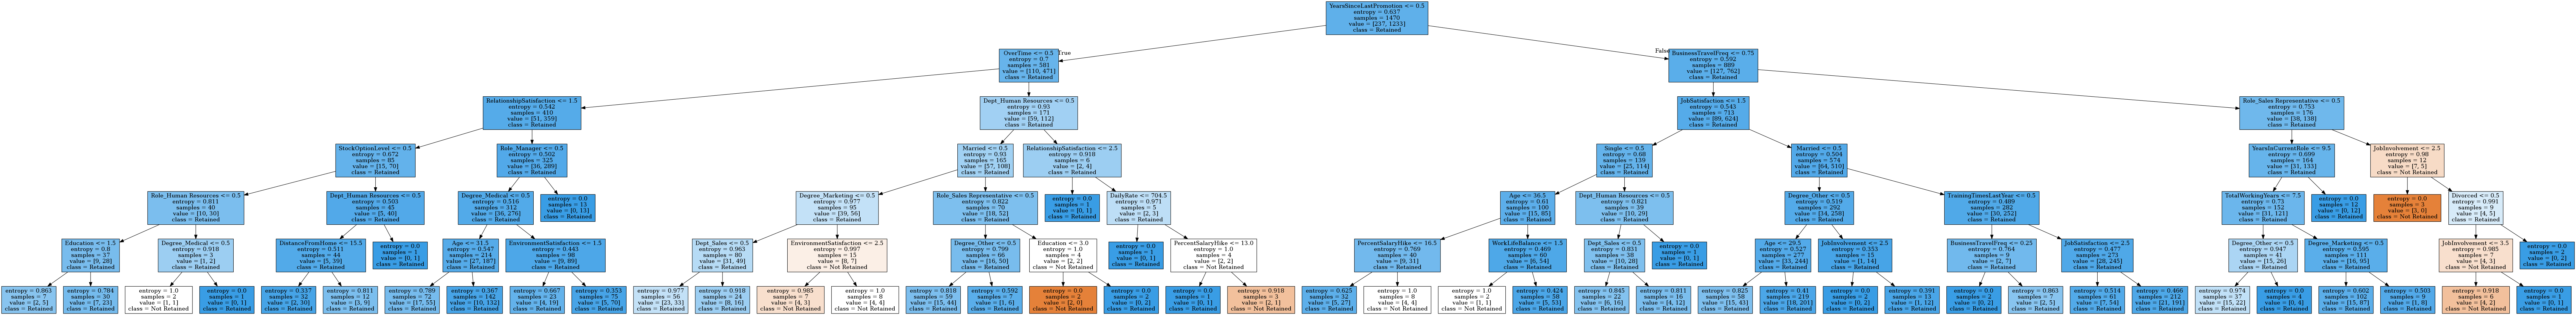

In [21]:
import time
start_time = time.time()

# Import Decision Tree Modeler from sklearn
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6
)
decision_tree.fit(factors, df.Retained)

print("--- %s seconds ---" % (time.time() - start_time))

# Packages for rendering our tree.
import pydotplus
import graphviz

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=factors.columns,
    class_names=['Not Retained', 'Retained'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree, factors, df.Retained, cv=10)

array([0.80405405, 0.81756757, 0.81756757, 0.80952381, 0.83673469,
       0.82993197, 0.84353741, 0.83561644, 0.84931507, 0.82876712])

In [19]:
start_time = time.time()

from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
X = factors
Y = df['Retained']
X = pd.get_dummies(X)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0244741439819 seconds ---


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X, Y, cv=10)

array([0.85810811, 0.86486486, 0.83783784, 0.84353741, 0.87755102,
       0.84353741, 0.83673469, 0.86986301, 0.84931507, 0.84931507])

The random forest took about 10 times as long to run than the single decision tree did.  The random forest also shows some gain in accuracy, as cross validation scores for the random forest were between .837 and .878 (compared to .804 and .849 for the decision tree.  In this case the random forest did not take long to run, so it was worth the gain in accuracy.  However, truly large sets of data could make a single decision tree more practical to run.